In [9]:
import pandas as pd
import numpy as np
from sklearn import datasets
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [10]:
## import house price data from sklearn datasets
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', version=1, as_frame=True)
names = boston.feature_names

bos = pd.DataFrame(boston.data)
bos.columns = names
bos.head() # display the first five rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [11]:
target = boston.target  # price variable we want to predict
bos['PRICE'] = target #create a new column with target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [16]:
#!pip install kaleido
# to download the graphs and unpload them to github.

In [13]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Initialize Plotly in offline mode
init_notebook_mode(connected=True)

trace = go.Scatter(x = bos.RM, y=target, mode='markers')

# Define layout with axis labels
layout = go.Layout(
    title="Scatter Plot of RM vs Target",
    xaxis=dict(title="Average Number of Rooms (RM)"),
    yaxis=dict(title="Target Variable")
)

# Combine trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Save the figure as an image (e.g., PNG)
fig.write_image("scatter_plot_rm_vs_target.png")

# Display the plot
fig.show()


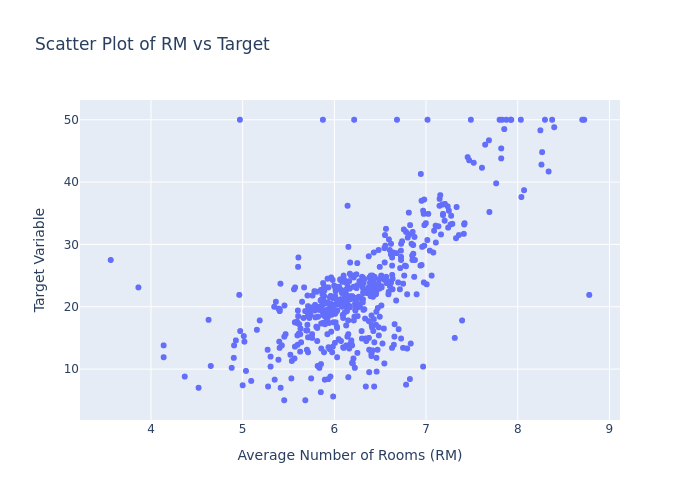

In [59]:
# as the number of rooms increase, the price of the house increases

# perform a linear regression
# normalizing
from sklearn import preprocessing

bos_new = bos
del bos_new['PRICE']
val = bos_new.values
min_max_scaler = preprocessing.MinMaxScaler()
val_scaled = min_max_scaler.fit_transform(val)
bos_norm = pd.DataFrame(val_scaled,columns=bos.columns)
bos_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [60]:
from sklearn.model_selection import train_test_split
X= pd.DataFrame(bos_norm['RM'],columns=['RM'])
y= target #This is the price column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [61]:
from sklearn import linear_model
lr = linear_model.LinearRegression() 
lr.fit(X_train,y_train) #Fit the model on the training data

LinearRegression()

In [62]:
#Predict price on test data
predicted = lr.predict(X_test)
lr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
lr_predictions[:20]

,Actual,Predicted
305,28.4,25.179933
193,31.1,26.822325
65,23.5,22.270042
349,26.6,28.063045
151,19.6,14.361567
433,14.3,23.573245
161,50.0,32.972370
129,14.3,16.441335
269,20.7,18.967406
226,37.6,37.890620


In [63]:
#Actual vs predicted score
# coefficient of determination of the prediction
# R2 = (1-u/v), where 
# u is the residual sum of squares ((y_true - y_pred)** 2).sum() 
# v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()
# the higher the better; the highest/best possible value is 1
score = lr.score(X_test,y_test) 

#Mean squared error
mseFull = np.mean((y_test - lr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.513277
Mean Squared Error: 48.520361


In [64]:
import plotly.graph_objs as go

def draw_graph(df, title, file_name="linear_regression_plot.png"):
    # Plot of linear regression
    trace = go.Scatter(x=df['Actual'].values,
                       y=df['Predicted'].values,
                       mode='markers')
    
    trace2 = go.Scatter(x=df['Actual'].values,
                        y=df['Actual'].values,
                        mode='lines',
                        name='lines')

    layout = go.Layout(
        title="%s" % title,
        xaxis=dict(
            title='Actual',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Predicted',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    data = [trace, trace2]
    fig = go.Figure(data=data, layout=layout)

    
    fig.write_image(file_name) 
    fig.show()


# Example usage (replace `lr_predictions` with your dataframe):
# draw_graph(lr_predictions, 'Linear Regression', 'lr_regression_plot.png')


In [65]:
#draw_graph(lr_predictions,'Linear Regression')
draw_graph(lr_predictions, 'Linear Regression', 'lr_regression_plot.png')

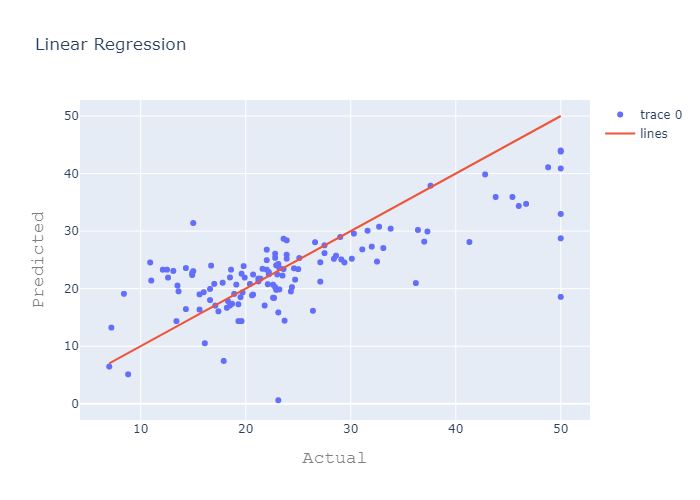

In [66]:
# Multiple Linear Regression
# A multiple linear regression is used to predict a target variable Y using two or more independent variables X1,X2,X3...

X= bos_norm
y= target #This is the price column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [67]:
mlr = linear_model.LinearRegression() 
#Fit the model on the training data
mlr.fit(X_train,y_train) 

LinearRegression()

In [68]:
#Predict price on test data 
predicted = mlr.predict(X_test)
mlr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
mlr_predictions[:20]

,Actual,Predicted
305,28.4,31.114396
193,31.1,31.820602
65,23.5,30.556206
349,26.6,22.440421
151,19.6,18.803988
433,14.3,16.276253
161,50.0,36.135344
129,14.3,14.624633
269,20.7,24.561962
226,37.6,37.279617


In [69]:
#Actual vs predicted score
score = mlr.score(X_test,y_test)
#Mean squared error
mseFull = np.mean((y_test - mlr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.674559
Mean Squared Error: 32.442537


In [70]:
draw_graph(mlr_predictions,'Multiple Linear Regression')

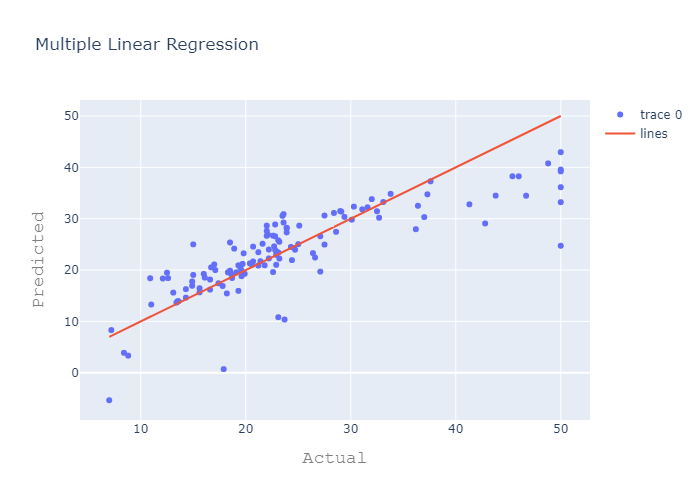

In [71]:
# Decision tree algorithms are used in a similar way to linear regression with the end goal to predict a target variable. 
# Decision Trees are much better at predicting non-linear relationships but can also suffer from over fitting

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 10,
                            max_depth=13, 
                            min_samples_leaf=4,
                            min_samples_split=4,
                            max_features = None)


dtr.fit(X_train, y_train)

predicted = dtr.predict(X_test)

dtr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})

dtr_predictions[:20]

,Actual,Predicted
305,28.4,23.060000
193,31.1,32.775000
65,23.5,23.475000
349,26.6,26.785714
151,19.6,18.775000
433,14.3,16.171429
161,50.0,43.225000
129,14.3,16.400000
269,20.7,20.185714
226,37.6,49.750000


In [72]:
#Model score 
score = dtr.score(X_test,y_test)
mseFull = np.mean((y_test - predicted)**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.746294
Mean Squared Error: 25.291414


In [73]:
draw_graph(dtr_predictions,'Decision Tree Regression')

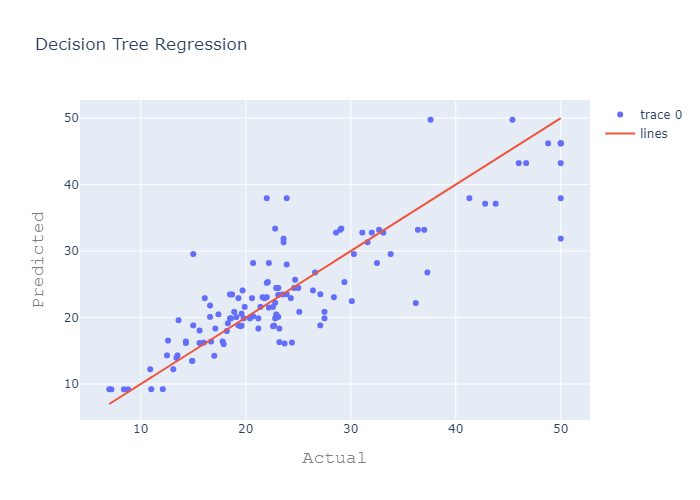

In [74]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor(random_state=10, 
                            max_depth=13, 
                            max_features=None)

params = {'min_samples_split': range(2, 10, 2),
          'min_samples_leaf': range(2, 10, 2),
          'max_depth': range(1, 13)}
    
grid_search = GridSearchCV(dtr, param_grid=params, cv=10)
grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

mseFull = np.mean((y_test - predicted)**2)

grid_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
score = grid_search.score(X_test, y_test)
print("predicted score against actual: %f" % score)
print("Mean Squared Error: %f" % mseFull)

grid_predictions.head()

Best score: 0.7758767442793008
Best parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
predicted score against actual: 0.762442
Mean Squared Error: 23.681619


,Actual,Predicted
305,28.4,22.063793
193,31.1,30.609091
65,23.5,23.755172
349,26.6,27.162500
151,19.6,20.043333


In [75]:
draw_graph(grid_predictions,'Decision Grid Search Regression')

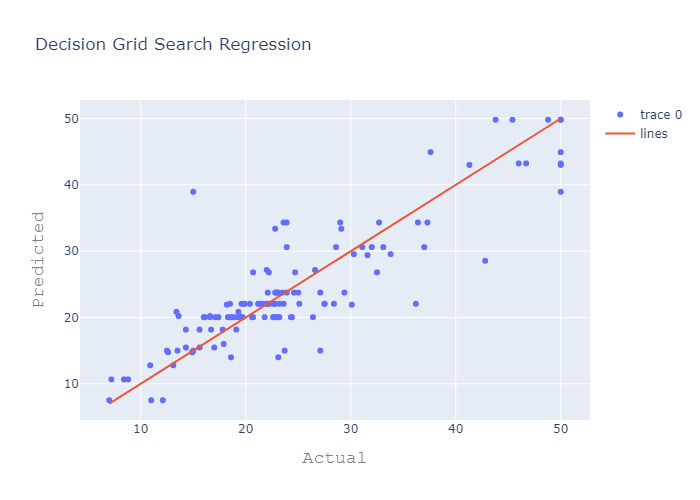

In [76]:
#Random Forest
#A Random Forest as the name suggests is a collection of decision trees. 
#It randomly subsets the data and feeds it into decision trees, also sometimes referred to as 'bagging'. 
#This is particularly useful as decision trees are prone to overfitting

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 100, random_state = 10,oob_score=True,
                           max_depth=7, min_samples_leaf=3,min_samples_split=9,n_jobs=-1)


rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
rf_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
rf_score = rf.score(X_test,y_test)
print("predicted score against actual: %f" % rf_score)
rf_predictions.head()

predicted score against actual: 0.834797


,Actual,Predicted
305,28.4,25.333491
193,31.1,29.497785
65,23.5,26.325478
349,26.6,28.452893
151,19.6,20.946747


In [77]:
params ={'max_depth':range(9,13),
         'min_samples_leaf':range(1,3),
         'min_samples_split':range(2,10,2)
}
grid_search = GridSearchCV(rf,param_grid=params,cv=10)
grid_search.fit(X_train, y_train)


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

grid_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
score = grid_search.score(X_test,y_test)
print("predicted score against actual: %f" % score)
grid_predictions.head()

Best score: 0.8431507935229563
Best parameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}
predicted score against actual: 0.861802


,Actual,Predicted
305,28.4,25.739281
193,31.1,29.650133
65,23.5,26.013621
349,26.6,28.474700
151,19.6,17.931524


In [78]:
draw_graph(grid_predictions,'Random Forest Regression')


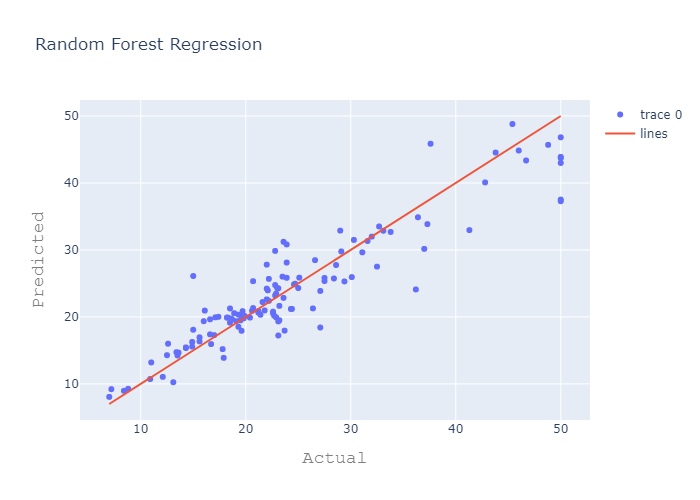

In [79]:
# Gradient Boosted Regression
# Gradient boosted regression functions in a similar way to a random forest. 
# Instead of creating x number of decision trees and aggregating them 
# a boosted learning algorithm will perform the same basic process of building a learning algorithm on samples of data 
# but will assign a higher and higher weight to a hard to classify observation.

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators= 100, 
                                random_state = 10,
                                max_depth=12, 
                                min_samples_leaf=4,
                                min_samples_split=4,
                                learning_rate=0.2)

gbr.fit(X_train, y_train)
predicted = gbr.predict(X_test)
gbr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
gbr_score = gbr.score(X_test,y_test)
print("predicted score against actual: %f" % gbr_score)
gbr_predictions.head()

predicted score against actual: 0.862393


,Actual,Predicted
305,28.4,25.104103
193,31.1,29.815745
65,23.5,25.429537
349,26.6,28.376858
151,19.6,21.289210


In [80]:
params ={'max_depth':range(1,5,2),
         'min_samples_leaf':range(1,5,2),
         'min_samples_split':range(2,4),
         'learning_rate':[0.1]
         }
grid_search = GridSearchCV(gbr,param_grid=params,cv=10)
grid_search.fit(X_train, y_train)


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

grid_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
score = grid_search.score(X_test,y_test)
print("predicted score against actual: %f" % score)
grid_predictions.head()

Best score: 0.8722425141137371
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
predicted score against actual: 0.891742


,Actual,Predicted
305,28.4,26.288515
193,31.1,29.454421
65,23.5,25.595406
349,26.6,26.926590
151,19.6,19.326003


In [81]:
draw_graph(grid_predictions,'Gradient Boosted Regression')

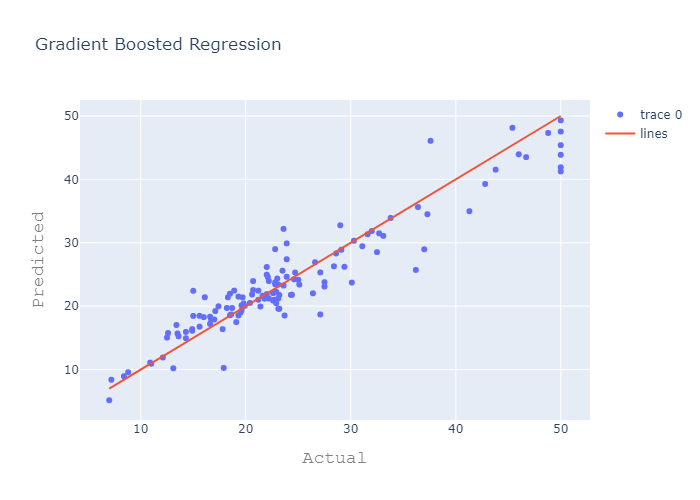